<a href="https://colab.research.google.com/github/AnniaBenitez/ExamenAML-Intento2/blob/main/MLA_Intento_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen de certificación AML - Intento 1**

Dataset:
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis

Detalles de Dataset (Traducido con ChatGPT):
**Atributos**

1. Personas
  - ID: Identificador único del cliente.
  - Year_Birth: Año de nacimiento del cliente.
  - Education: Nivel educativo del cliente.
  - Marital_Status: Estado civil del cliente.
  - Income: Ingreso anual del hogar del cliente.
  - Kidhome: Número de niños en el hogar del cliente.
  - Teenhome: Número de adolescentes en el hogar del cliente.
  - Dt_Customer: Fecha en que el cliente se registró en la compañía.
  - Recency: Número de días desde la última compra del cliente.
  - Complain: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario.

2. Productos
  - MntWines: Cantidad gastada en vinos en los últimos 2 años.
  - MntFruits: Cantidad gastada en frutas en los últimos 2 años.
  - MntMeatProducts: Cantidad gastada en productos cárnicos en los últimos 2 años.
  - MntFishProducts: Cantidad gastada en productos de pescado en los últimos 2 años.
  - MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años.
  - MntGoldProds: Cantidad gastada en productos de oro en los últimos 2 años.
  - Promociones
  - NumDealsPurchases: Número de compras realizadas con descuento.
  - AcceptedCmp1: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.
  - AcceptedCmp2: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.
  - AcceptedCmp3: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.
  - AcceptedCmp4: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.
  - AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.
  - Response: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.
3. Lugar
  - NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa.
  - NumCatalogPurchases: Número de compras realizadas usando un catálogo.
  - NumStorePurchases: Número de compras realizadas directamente en tiendas.
  - NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes.

In [ ]:
#Librerias

import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc

# 1. Exploración y preprocesamiento de datos:
  - Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  - Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.


In [ ]:
#usamos directo de kaggle para no descargar :)
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
print("Path to dataset files:", path)
data = pd.read_csv(path + "/marketing_campaign.csv", sep='\t')
print(data)

Path to dataset files: /root/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

podemos ver que hay valores nulos en el campo Income, el resto parece no tener pero hay que revisar

In [ ]:
print(data.isna().sum().sort_values(ascending=False))

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64


In [ ]:
#Considerando que Income tiene nulos, vamos a imputar con la media para mantener la distribución, considerando también que no son muchos datos 24 de 2240
imputer = SimpleImputer(strategy='mean')
data['Income'] = imputer.fit_transform(data[['Income']])

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ahora ya no hay nulos como tal pero debemos ver que otros datos tengan sentido

In [ ]:
#ChatGPT me ayudo a hacer este resumen, créditos a él
summary = pd.DataFrame({
    "Column": data.columns,
    "Min": [data[col].min() if data[col].dtype != 'object' else None for col in data.columns],
    "Max": [data[col].max() if data[col].dtype != 'object' else None for col in data.columns],
    "Unique Values": [data[col].nunique() for col in data.columns]
})

# Mostrar resumen
print(summary)

                 Column     Min       Max  Unique Values
0                    ID     0.0   11191.0           2240
1            Year_Birth  1893.0    1996.0             59
2             Education     NaN       NaN              5
3        Marital_Status     NaN       NaN              8
4                Income  1730.0  666666.0           1975
5               Kidhome     0.0       2.0              3
6              Teenhome     0.0       2.0              3
7           Dt_Customer     NaN       NaN            663
8               Recency     0.0      99.0            100
9              MntWines     0.0    1493.0            776
10            MntFruits     0.0     199.0            158
11      MntMeatProducts     0.0    1725.0            558
12      MntFishProducts     0.0     259.0            182
13     MntSweetProducts     0.0     263.0            177
14         MntGoldProds     0.0     362.0            213
15    NumDealsPurchases     0.0      15.0             15
16      NumWebPurchases     0.0

viendo los rangos de números en variables numéricas no parecen haber números erroneos a primera vista (cantidades negativas, por ejemplo). A medida que hacemos el análisis vamos viendo mejor.

vamos a eliminar columnas que considero innecesarias. Primeramente el ID, porque es solo un identificador para el cliente. Segundo, comparando el detalle de datos de Kaggle con las columnas que recibí, tengo 2 columnas extras que son Z_revenue y Z_CostContact. En ambas, desconozco qué dato representan pero viendo el resumen de arriba, veo que solo contienen un valor que es el 3 y el 11, por lo que sin tener más pistas voy a pasar a eliminarlas también.

In [ ]:
data = data.drop(columns=['ID','Z_CostContact', 'Z_Revenue'])

solo para ver...

In [ ]:
data['Marital_Status'].unique() #aca estoy probando valores uno a uno, pero dejo esta linea escrita por el caso especial


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

creo que absurd y YOLO no son estados civiles jajaja, vamos a sustituir por Otro

In [ ]:
data['Marital_Status'] = data['Marital_Status'].replace(['Absurd', 'YOLO'], 'Other')
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Other'], dtype=object)

In [ ]:
#sigo probando
data['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-05-2013', '29-10-2012', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '05-11-2013', '02-10-2013', '28-06-2014',
       '09-11-2012', '24-05-2013', '01-01-2014', '08-11-2012',
       '12-05-2014', '11-08-2012', '07-06-2014', '12-06-2013',
       '19-11-2012', '02-04-2013', '28-04-2014', '17-06-2013',
       '03-03-2014', '04-07-2013', '07-09-2012', '18-02-2013',
       '11-06-2013', '06-12-2013', '21-05-2013', '11-05-2014',
       '19-03-2014', '27-09-2013', '08-04-2013', '11-09

también vamos a cambiar los tipos de datos

In [ ]:
data = data.astype({
    'Year_Birth': 'int64',          # el año puede ser un entero
    'Education': 'category',        # categorico: 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle' son posibles categorias
    'Marital_Status': 'category',   # el estado civil es categorico: 'Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO'
    'Income': 'float64',            # Ingreso sera flotante
    'Kidhome': 'int64',             # Niños en casa: entero
    'Teenhome': 'int64',            # Adolescentes en casa: entero
    #'Dt_Customer': 'datetime64',    # Fecha de inscripción: fecha
    'Recency': 'int64',             # Recencia: entero
    'MntWines': 'int64',            # Gasto en vinos: entero
    'MntFruits': 'int64',           # Gasto en frutas: entero
    'MntMeatProducts': 'int64',     # Gasto en carne: entero
    'MntFishProducts': 'int64',     # Gasto en pescado: entero
    'MntSweetProducts': 'int64',    # Gasto en dulces: entero
    'MntGoldProds': 'int64',        # Gasto en oro: entero
    'NumDealsPurchases': 'int64',   # Compras con descuento: entero
    'NumWebPurchases': 'int64',     # Compras web: entero
    'NumCatalogPurchases': 'int64', # Compras catálogo: entero
    'NumStorePurchases': 'int64',   # Compras tienda: entero
    'NumWebVisitsMonth': 'int64',   # Visitas web: entero
    'AcceptedCmp3': 'bool',
    'AcceptedCmp4': 'bool',
    'AcceptedCmp5': 'bool',
    'AcceptedCmp1': 'bool',
    'AcceptedCmp2': 'bool',
    'Complain': 'bool',
    'Response': 'bool'
})

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Verificar los nuevos tipos de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   category      
 2   Marital_Status       2240 non-null   category      
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [ ]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000
std,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645


In [ ]:
# Valores duplicados
print(f"Cantidad de datos duplicados: {data.duplicated().sum()}")

Cantidad de datos duplicados: 182


In [ ]:
duplicadas = data[data.duplicated()]
duplicadas_ordenadas = duplicadas.sort_values(by='Dt_Customer', ascending=True)
duplicadas_ordenadas

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1610,1988,Graduation,Single,68655.0,0,0,2012-08-10,95,456,19,...,5,11,3,False,False,False,False,False,False,False
2064,1974,Graduation,Married,67445.0,0,1,2012-08-12,63,757,80,...,6,12,6,False,False,False,False,False,False,False
1554,1974,Graduation,Married,67445.0,0,1,2012-08-12,63,757,80,...,6,12,6,False,False,False,False,False,False,False
1574,1977,Graduation,Married,42014.0,1,0,2012-08-17,56,244,15,...,1,6,8,False,False,False,False,False,False,True
1511,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,0,...,2,2,8,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1966,Graduation,Married,44794.0,0,1,2014-06-08,99,54,0,...,0,3,6,False,False,False,False,False,False,False
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,False,False,False,True,False,False,False
1768,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,...,0,3,6,False,False,False,False,False,False,False
1455,1969,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,...,4,7,2,False,False,False,False,False,False,False


In [ ]:
#eliminamos datos duplicados
data = data.drop_duplicates()

procedemos a ver los outliers

In [ ]:
#tomamos las columnas numéricas
numericas = data.select_dtypes(include=['int64', 'float64'])

# Función para detectar outliers usando el rango intercuartílico
def detect_outliers(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Detectar outliers en el DataFrame de variables numéricas
outliers = detect_outliers(numericas, numericas.columns)

print(f"Número de outliers: {len(outliers)}")

# Mostrar los outliers
print(outliers)

Número de outliers: 648
{0, 2048, 2049, 2056, 9, 2058, 2059, 12, 17, 2065, 2067, 18, 21, 2071, 24, 2074, 27, 29, 2081, 2084, 2086, 39, 40, 2090, 45, 2093, 2096, 49, 2098, 51, 53, 54, 55, 56, 2109, 62, 64, 67, 69, 70, 2118, 72, 2123, 76, 77, 2127, 2131, 2132, 2134, 88, 90, 2144, 98, 102, 2151, 104, 107, 109, 110, 111, 2160, 2163, 116, 117, 2167, 2168, 2171, 2172, 124, 126, 2175, 2176, 125, 130, 2173, 132, 2178, 135, 2185, 2186, 2187, 140, 2188, 142, 2190, 2193, 2194, 148, 2198, 2203, 2206, 159, 161, 2211, 164, 2213, 166, 168, 176, 2226, 2228, 182, 2233, 2235, 188, 191, 192, 197, 198, 201, 202, 203, 209, 211, 212, 213, 214, 226, 228, 230, 231, 239, 240, 241, 243, 244, 247, 248, 249, 252, 266, 268, 270, 276, 277, 278, 279, 286, 287, 288, 292, 295, 305, 312, 313, 335, 336, 338, 339, 340, 345, 347, 351, 353, 357, 360, 364, 365, 366, 368, 378, 387, 390, 392, 401, 404, 411, 415, 418, 419, 423, 424, 426, 429, 430, 431, 432, 447, 455, 456, 459, 461, 466, 470, 472, 479, 485, 490, 492, 493, 497, 

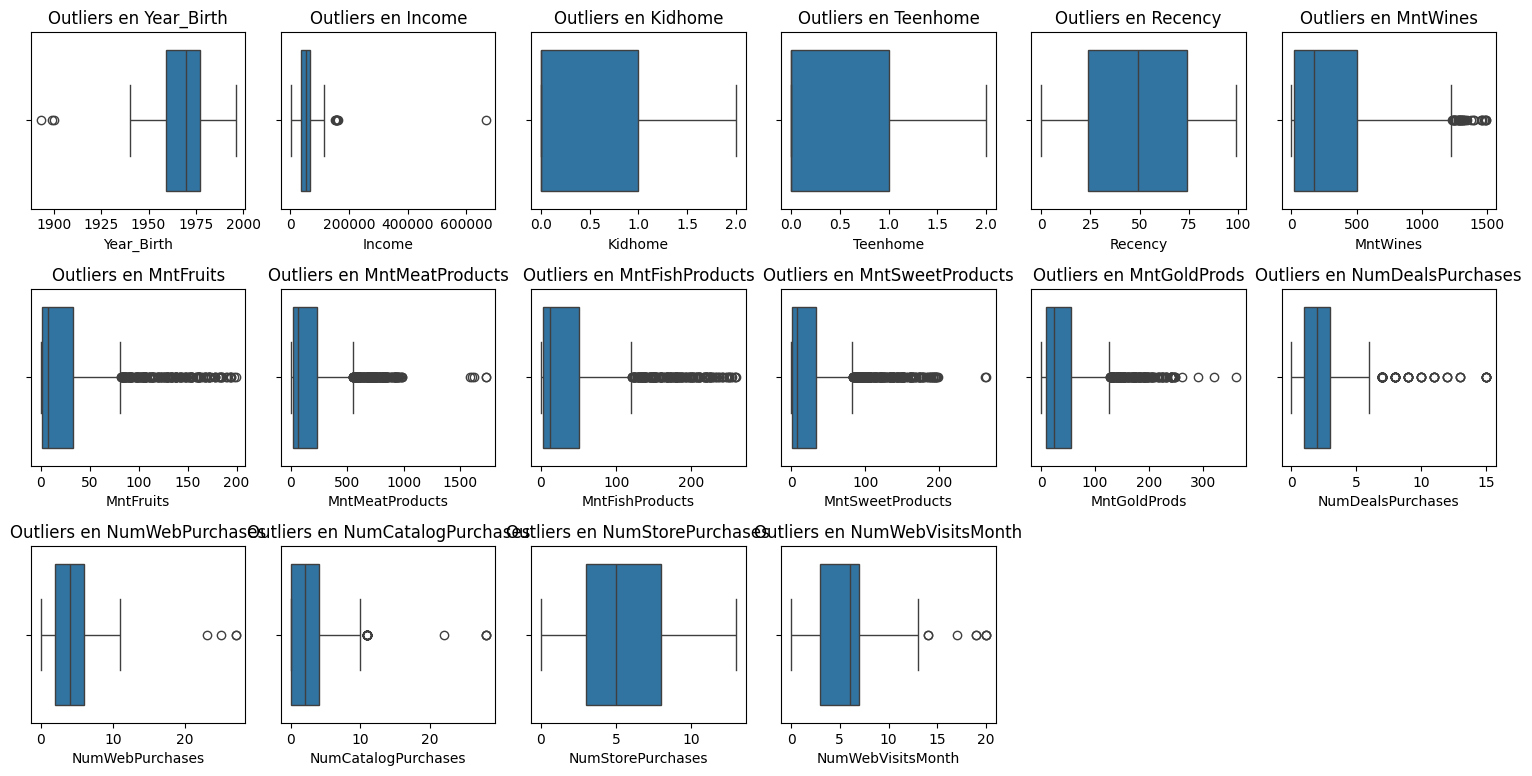

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numericas.columns, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(x=numericas[column])
    plt.title(f'Outliers en {column}')

plt.tight_layout()
plt.show()

Viendo los gráficos podemos decir que:
- Year_Birth: Hay algunos clientes con años de nacimiento fuera del rango típico. Los valores extremos probablemente representen datos de personas de edad muy avanzada
- Income: Se observan valores atípicos en los ingresos, representando a clientes con ingresos significativamente mayores al promedio.
- Kidhome, teenhome y recently: sin valores atípicos
- MntWines: Hay valores atipicos que probablemente indiquen que hay un número de clientes que gasta más de lo normal en vinos.
- MntFruits: podemos sacar la misma conclusion que vinos.
- MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds y el resto de los casos muestran clientes que consumen más de lo común algo.


In [ ]:
# Filtrar el DataFrame sin outliers
data_sin_outliers = data.drop(index=outliers)
print(f"Tamaño del DataFrame con outliers: {data.shape}")
print(f"Tamaño del DataFrame sin outliers: {data_sin_outliers.shape}")

Tamaño del DataFrame con outliers: (2058, 26)
Tamaño del DataFrame sin outliers: (1410, 26)


Probamos pasando los datos numéricos a sus correspondientes logaritmicos a ver si mejoran los outliers

In [ ]:
data.select_dtypes(include=['float64', 'int64']).columns.tolist()

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [ ]:
# variables numéricas
columnas_logaritmicas  = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'NumWebVisitsMonth']

In [ ]:
#  numéricas a funcion logaritmica
for col in columnas_logaritmicas:
    data[col] = data[col].apply(lambda x: np.log1p(x))

probamos aplicar outliers solo para columnas de variable continua a ver si mejora

In [ ]:
# Identificamos todas las columnas numéricas
num_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outliers = identify_outliers_iqr(data, num_columns)

print(f"Número total de outliers identificados: {len(outliers)}")

Número total de outliers identificados: 127
Porcentaje de outliers: 6.17%


600 y tanto vs 127, hay mejora aqui

In [ ]:
# Filtrar el DataFrame sin outliers
data_sin_outliers = data.drop(index=outliers)
print(f"Tamaño del DataFrame con outliers: {data.shape}")
print(f"Tamaño del DataFrame sin outliers: {data_sin_outliers.shape}")

Tamaño del DataFrame con outliers: (2058, 26)
Tamaño del DataFrame sin outliers: (1410, 26)


ahora balancearemos datos

In [ ]:
cant_respuestas = data['Response'].value_counts()
cant_respuestas

,count
Response,
False,1745
True,313


In [ ]:
# División de datos en X e y
X = data.drop(columns=['Response', 'Dt_Customer'])
y = data["Response"]

# Combinar X e y en un solo dataframe
datos_balanceados = pd.concat([X, y], axis=1)

# Separar clases mayoritaria y minoritaria
class_majority = datos_balanceados[datos_balanceados['Response'] == False]
class_minority = datos_balanceados[datos_balanceados['Response'] == True]

# Submuestreo de la clase mayoritaria para igualar a la clase minoritaria
class_majority_downsampled = resample(
    class_majority,
    replace=False,
    n_samples=len(class_minority),
    random_state=42
)

# Combinar clases balanceadas
datos_balanceados = pd.concat([class_majority_downsampled, class_minority])

# Mezclar aleatoriamente los datos
datos_balanceados = datos_balanceados.sample(frac=1, random_state=42).reset_index(drop=True)

# Actualizar X e y con los datos balanceados
X = datos_balanceados.drop("Response", axis=1)
y = datos_balanceados["Response"]

# Verificar el balance de clases
print(f"Datos después de aplicar submuestreo: \nCaracterísticas: {X.shape} \nClases balanceadas: {np.bincount(y)}")


Datos después de aplicar submuestreo: 
Características: (626, 24) 
Clases balanceadas: [313 313]


Ahora si tenemos una mejor distribución ya más balanceada



# 2. Análisis no supervisado:
- Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    - K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
    - PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.


In [ ]:
datos_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           626 non-null    int64   
 1   Education            626 non-null    category
 2   Marital_Status       626 non-null    category
 3   Income               626 non-null    float64 
 4   Kidhome              626 non-null    int64   
 5   Teenhome             626 non-null    int64   
 6   Recency              626 non-null    int64   
 7   MntWines             626 non-null    float64 
 8   MntFruits            626 non-null    float64 
 9   MntMeatProducts      626 non-null    float64 
 10  MntFishProducts      626 non-null    float64 
 11  MntSweetProducts     626 non-null    float64 
 12  MntGoldProds         626 non-null    float64 
 13  NumDealsPurchases    626 non-null    int64   
 14  NumWebPurchases      626 non-null    float64 
 15  NumCatalogPurchases  62

## Enfoque de análisis: PCA

In [ ]:
# Identificar columnas numéricas y categóricas
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Aplicar el preprocesador al conjunto de características
X_processed = preprocessor.fit_transform(X)

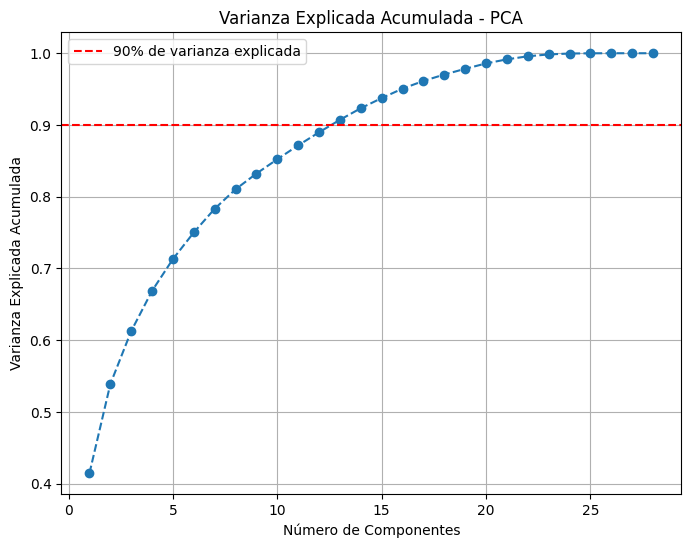

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_processed)

# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("Varianza Explicada Acumulada - PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.axhline(y=0.90, color='r', linestyle='--', label="90% de varianza explicada")
plt.legend()
plt.grid()
plt.show()

Se necesitan 13 componentes para capturar al menos el 90% de la variabilidad.


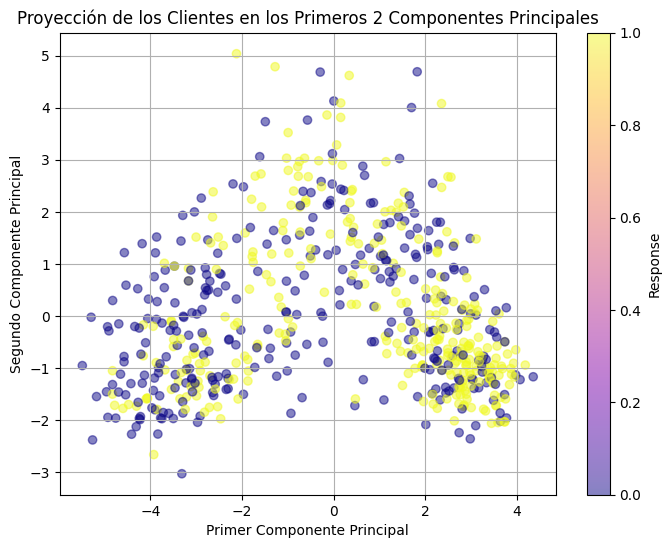

In [ ]:
# Determinar el número de componentes necesarios para capturar el 90% de la varianza
nro_components = next(i for i, var in enumerate(explained_variance) if var >= 0.90) + 1
print(f"Se necesitan {nro_components} componentes para capturar al menos el 90% de la variabilidad.")

# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=nro_components, random_state=42)
X_reduced = pca.fit_transform(X_processed)

# Visualización de los clientes en el nuevo espacio de características (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='plasma', alpha=0.5)
plt.title("Proyección de los Clientes en los Primeros 2 Componentes Principales")
plt.xlabel("Primer Componente Principal")
plt.ylabel("Segundo Componente Principal")
plt.colorbar(label='Response')
plt.grid()
plt.show()

Necesito 13 componentes para capturar al menos el 90% de la variabilidad


# 3. Modelado con MLP
  - Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
  - Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
  - Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.


In [ ]:
# Dividir los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 500 muestras
Conjunto de prueba: 126 muestras


In [ ]:
# Crear modelo
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

entrenamos el modelo

In [ ]:
history = modelo.fit(
    X_train, y_train,
    epochs=30, batch_size=32,
    validation_split=0.2,verbose=1
)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5379 - loss: 0.7220 - val_accuracy: 0.4200 - val_loss: 0.7170
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5552 - loss: 0.6714 - val_accuracy: 0.5900 - val_loss: 0.6934
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6530 - loss: 0.6280 - val_accuracy: 0.5600 - val_loss: 0.6816
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6637 - loss: 0.5989 - val_accuracy: 0.5800 - val_loss: 0.6681
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7017 - loss: 0.5703 - val_accuracy: 0.5700 - val_loss: 0.6609
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7320 - loss: 0.5351 - val_accuracy: 0.6000 - val_loss: 0.6541
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 0.5074 - val_accuracy: 0.5900 - val_loss: 0.6515
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 0.4935 - val_accuracy: 0.5900 - val_l

In [ ]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Pérdida: {loss}")
print(f"Precisión: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.5901 
Pérdida: 0.6086540818214417
Precisión: 0.7063491940498352


tenemos un modelo con 70.6% de precisión


# 4. Evaluación del modelo:
  - Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
  - Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

iniciamos evaluando el MPL


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Evaluación en el conjunto de entrenamiento:
Precisión: 0.8120
Recall: 0.8400
F1-Score: 0.8171


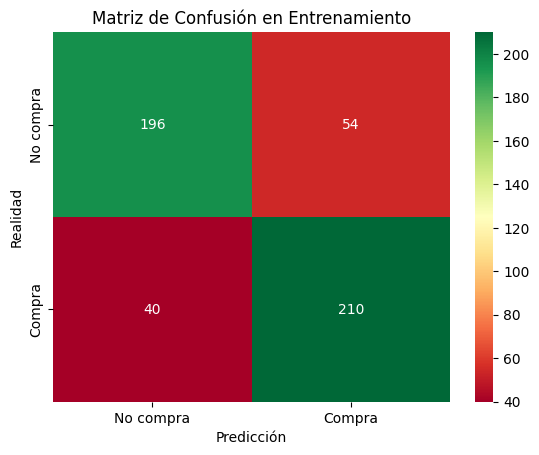

In [ ]:
# Predecir las etiquetas en el conjunto de entrenamiento
y_train_pred = (modelo.predict(X_train) > 0.5).astype("int32")

# Calcular las métricas en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Imprimir las métricas de evaluación en entrenamiento
print(f"\nEvaluación en el conjunto de entrenamiento:")
print(f"Precisión: {train_accuracy:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

# Mostrar la matriz de confusión en entrenamiento
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="RdYlGn", xticklabels=["No compra", "Compra"], yticklabels=["No compra", "Compra"])
plt.title("Matriz de Confusión en Entrenamiento")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Precisión: 0.7460
Recall: 0.6667
F1-Score: 0.7241


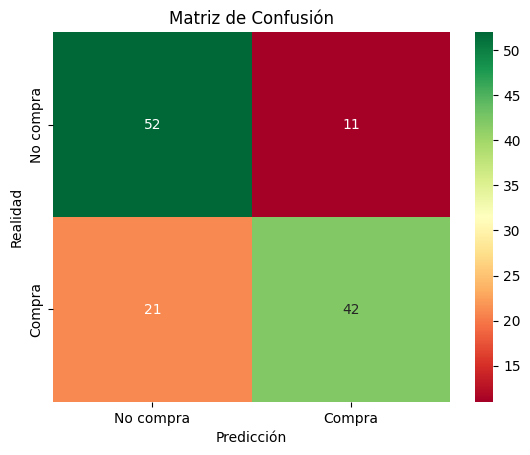


Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.71      0.83      0.76        63
        True       0.79      0.67      0.72        63

    accuracy                           0.75       126
   macro avg       0.75      0.75      0.74       126
weighted avg       0.75      0.75      0.74       126



In [ ]:
# Predecir las etiquetas en el conjunto de prueba
y_pred = (modelo.predict(X_test) > 0.5).astype("int32")  # Usamos umbral 0.5 para clasificación binaria

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir el reporte de clasificación
print(f"Precisión: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Mostrar la matriz de confusión. Todo rojo y verde por la navidad :)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlGn", xticklabels=["No compra", "Compra"], yticklabels=["No compra", "Compra"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Mostrar el reporte de clasificación completo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

## Visualiza las curvas

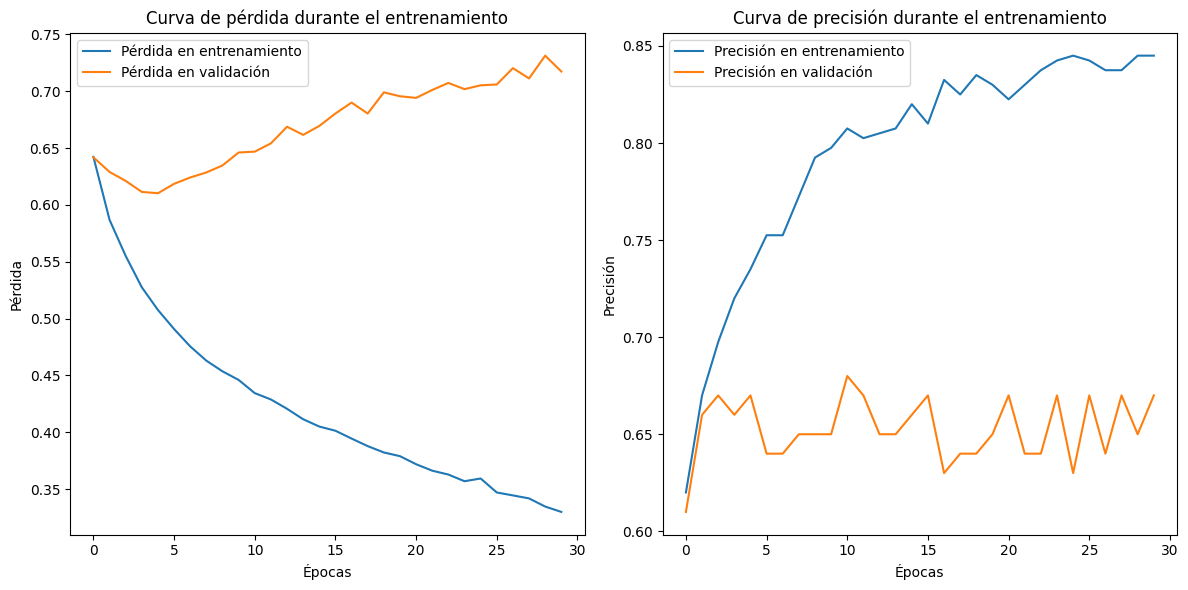

In [ ]:
# Visualización de la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida en el entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión en el entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Curva de precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


# 5. Discusión y análisis:
  - Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?



Al reducir las dimensiones con PCA, vimos que solo necesitábamos 13 componentes para capturar el 90% de la varianza. Esto significa que, aunque tenemos 24 características, la mayoría de la información se puede resumir en menos dimensiones.
Al visualizar los datos en los primeros dos componentes, los clientes se agrupan en patrones que podrían estar relacionados con su comportamiento de compra, como edad o servicios que utilizan.


  - Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

El rendimiento del modelo MLP muestra buenos resultados en términos de precisión (81.2%) en entrenamiento, pero una disminución en el conjunto de prueba (74.6%). Esto sugiere que el modelo podría estar sobreajustado a los datos de entrenamiento, lo que significa que ha aprendido demasiado bien las características específicas de esos datos, pero no generaliza bien a nuevos datos. Creo que el modelo es adecuado pero mejoraría algunos ajustes para evitar el sobreajuste.


# 6- Entrega final:
  - Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.


## Preprocesamiento inicial
### Carga y Exploración Inicial

- Se importaron diversas librerías como pandas, numpy, seaborn, sklearn, matplotlib y tensorflow para llevar a cabo el análisis y el modelado.
- Se hizo un análisis de los datos contenidos en el dataset, eliminando columnas que no parezcan implicar en los resultados finales, arreglando valores y cambiando tipos de datos, además de imputar los valores faltantes usando la media.
- Se verificaron que los datos numéricos tengan sentido, verificando los máximos y mínimos.
- Eliminación de duplicados
- Transformación logaritmica

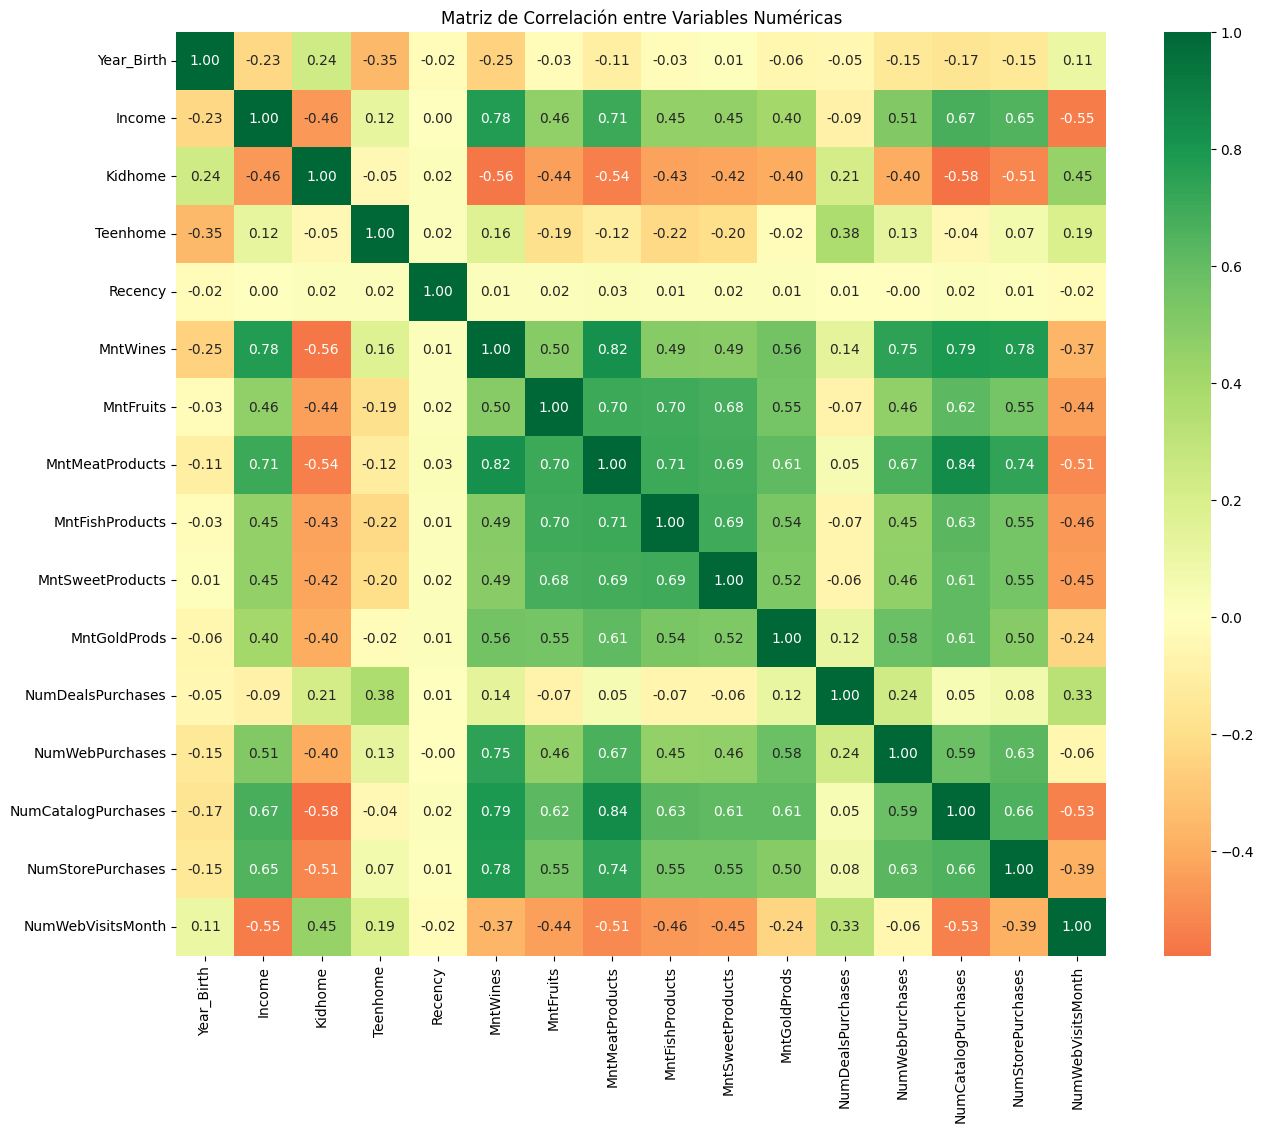

In [ ]:
# Mapa de calor para ver la relación entre datos numéricos
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

* También se balancearon los datos correspondientes a response, debido a que había mucha diiferencia como se ve en el gráfico

<ipython-input-80-61cdb3ccadca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=data, palette='pastel')


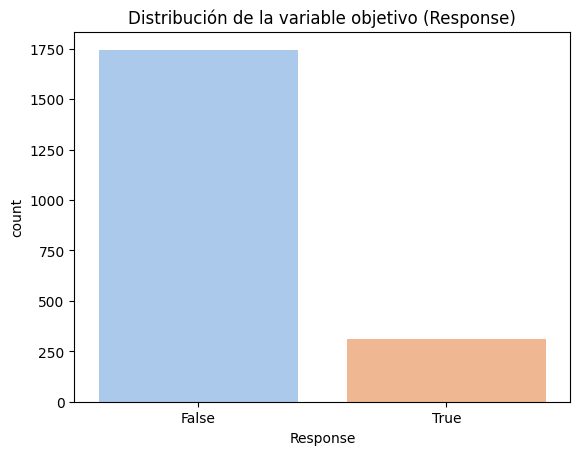

Response
False    1745
True      313
Name: count, dtype: int64


In [ ]:
# grafico de por qué balanceé
sns.countplot(x='Response', data=data, palette='pastel')
plt.title("Distribución de la variable objetivo (Response)")
plt.show()

- Se aplicó PCA para visualizar patrones y reducir la complejidad del dataset.

### modelado MLP

* División en conjunto de entrenamiento y prueba.
* Configuración de red neuronal con Keras.
* Entrenamiento y prueba
* Se muestran métricas de Evaluación (Accuracy, Precision, Recall y F1-Score).
* Se muestran graficos de resultado

Como conclusión, el modelo MLP alcanzó una precisión del 71% en el conjunto de prueba. Aunque este resultado no es óptimo, se considera aceptable dado los datos desbalanceados y la alta proporción de outliers. Podemos decir que el modelo es útil para el propósito de clasificación